In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, log_loss
from sklearn.datasets import make_circles
from tqdm import tqdm

plt.style.use('dark_background')
plt.rcParams.update({
    "figure.facecolor":  (0.12 , 0.12, 0.12, 1),
    "axes.facecolor": (0.12 , 0.12, 0.12, 1),
})

### Fonctions

In [50]:
def init(dims):
    parametres = {}
    C = len(dims)
    np.random.seed(0)
    for i in range(1, C):
        parametres['W' + str(i)] = np.random.randn(dims[i], dims[i - 1])
        parametres['b' + str(i)] = np.random.randn(dims[i], 1)
    
    return parametres

def forward_propagation(X, parametres):
    activations = {'A0': X}
    C = len(parametres) // 2

    for i in range(1, C + 1):
        Z = parametres['W' + str(i)].dot(activations['A' + str(i - 1)]) + parametres['b' + str(i)]
        activations['A' + str(i)] = 1 / (1 + np.exp(-Z))

    return activations


def back_propagation(y, activations: dict, parametres: dict):
    m = y.shape[1]
    C = len(parametres) // 2

    dZ = activations['A' + str(C)] - y 
    gradients = {}

    for i in reversed(range(1, C + 1)):
        gradients['dW' + str(i)] = 1 / m * np.dot(dZ, activations['A' + str(i - 1)].T)
        gradients['db' + str(i)] = 1 / m * np.sum(dZ, axis=1, keepdims=True)
        if i > 1 :
            dZ = np.dot(parametres['W' + str(i)].T, dZ) * activations['A' + str(i - 1)] * (1 - activations['A' + str(i - 1)])
    
    return gradients

def update(gradients: dict, parametres: dict, learning_rate):
    C = len(parametres) // 2

    for i in range(1, C + 1):
        parametres['W' + str(i)] = parametres['W' + str(i)] - learning_rate * gradients['dW' + str(i)]
        parametres['b' + str(i)] = parametres['b' + str(i)] - learning_rate * gradients['db' + str(i)]
    
    return parametres

def predict(X, parametres):
    activations = forward_propagation(X, parametres)
    A2 = activations['A' + str(len(parametres) // 2)]
    return A2 >= 0.5

def visualisations(X, y, parametres, train_history):
    x_min, x_max = X[0, :].min(), X[0, :].max() + 0.1
    y_min, y_max = X[1, :].min(), X[1, :].max() + 0.1

    # Créer une grille de points à évaluer par le modèle
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                        np.arange(y_min, y_max, 0.01))
    Z = predict(np.c_[xx.ravel(), yy.ravel()].T, parametres)
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(18, 4))
    plt.subplot(1, 3, 3)
    plt.contourf(xx, yy, Z, alpha=0.25, cmap='summer')
    plt.contour(xx, yy, Z, alpha=1, colors='red', linewidths=1)
    plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
    plt.subplot(1, 3, 1)
    plt.plot(train_history[:, 0], label='train loss')
    plt.legend()
    plt.subplot(1, 3, 2)
    plt.plot(train_history[:, 1], label='train acc')
    plt.legend()

In [54]:
def deep_neural_network(X, y, hidden_layers = (32, 32, 32), learning_rate = 0.1, n_iter = 1000):
    # initialisation W, b
    np.random.seed(0)

    dimensions = list(hidden_layers)
    dimensions.insert(0, X.shape[0])
    dimensions.append(y.shape[0])
    parametres = init(dimensions)

    train_history = np.zeros((int(n_iter) // 10, 2))

    Af = 'A' + str(len(parametres) // 2)

    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X, parametres)
        # mise a jour
        grad = back_propagation(y, activations, parametres)
        parametres = update(grad, parametres, learning_rate)

        if i % 10 == 0:
            # Train
            train_history[i // 10, 0] = (log_loss(y.flatten(), activations[Af].flatten()))
            y_pred = predict(X, parametres)
            train_history[i // 10, 1] = (accuracy_score(y.flatten(), y_pred.flatten()))

    visualisations(X, y, parametres, train_history)
    plt.show()

    print(train_history[-1, 1])

    return parametres

dimensions de X: (2, 100)
dimensions de y: (1, 100)


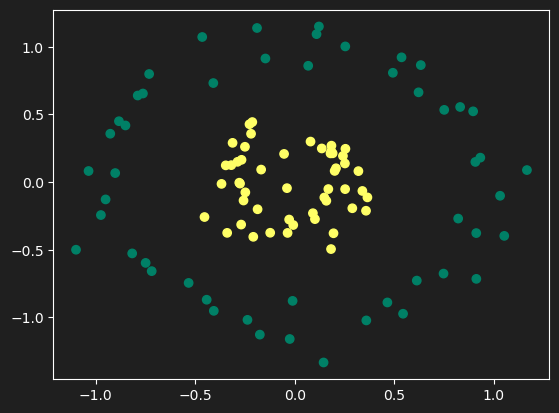

In [44]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

### Tests fonctions

In [20]:
parametres = init([2, 32, 32, 1])

for k, v in parametres.items():
    print(k, v.shape)

W1 (32, 2)
b1 (32, 1)
W2 (32, 32)
b2 (32, 1)
W3 (1, 32)
b3 (1, 1)


In [31]:
activations = forward_propagation(X, parametres)

for k, v in activations.items():
    print(k, v.shape)

A0 (2, 100)
A1 (32, 100)
A2 (32, 100)
A3 (1, 100)


In [34]:
grad = back_propagation(y, activations, parametres)
for k, v in grad.items():
    print(k, v.shape)

dW3 (1, 32)
db3 (1, 1)
dW2 (32, 32)
db2 (32, 1)
dW1 (32, 2)
db1 (32, 1)


100%|██████████| 1000/1000 [00:00<00:00, 1004.68it/s]


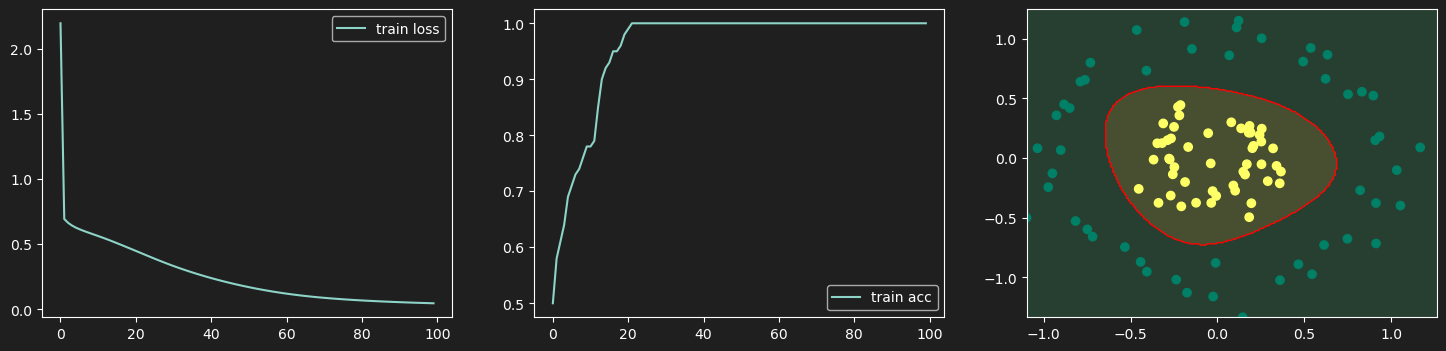

1.0


In [55]:
params = deep_neural_network(X, y, hidden_layers=(32, 32, 32), learning_rate=0.1, n_iter=1000)